In [14]:
import pure_cv as vc
import moveread.boxes as bxs
from scoresheet_models import models
import robust_extraction as re
from robust_extraction import templates as ts

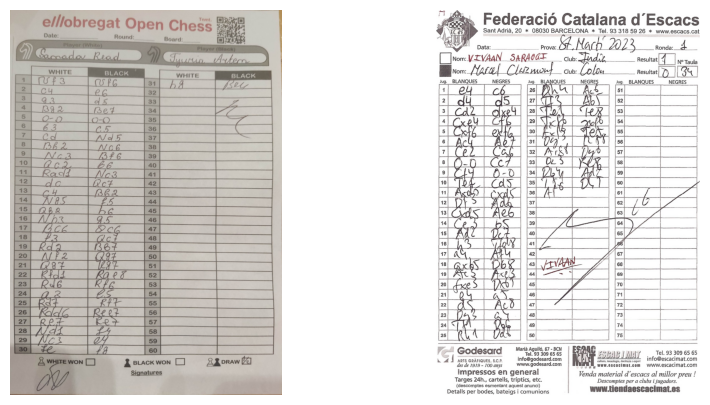

In [20]:
fcde_sheet = vc.imread('/home/m4rs/cit/resources/images/models/fcde/xl.jpg')
llobre_sheet = vc.imread('/home/m4rs/cit/resources/images/models/llobregat23/xl.jpg')
vc.show(llobre_sheet, fcde_sheet)

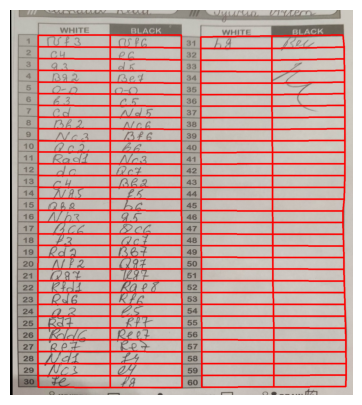

In [21]:
# BOX COORDS
res = re.descaled_extract(llobre_sheet, ts.models['llobregat23'], auto_h=4000, descale_h=4000).unsafe()
vc.show(vc.draw.contours(res.contours, res.corr_img))

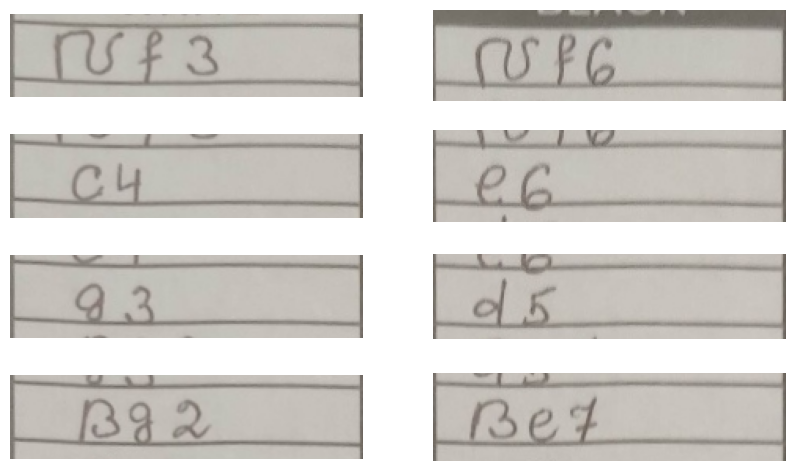

In [22]:
ann = bxs.exportable(bxs.Annotations(box_contours=res.contours), 'llobregat23').unsafe()
boxes = bxs.export(res.corr_img, ann)
vc.show(*boxes[:8], ncols=2, height=1.5)

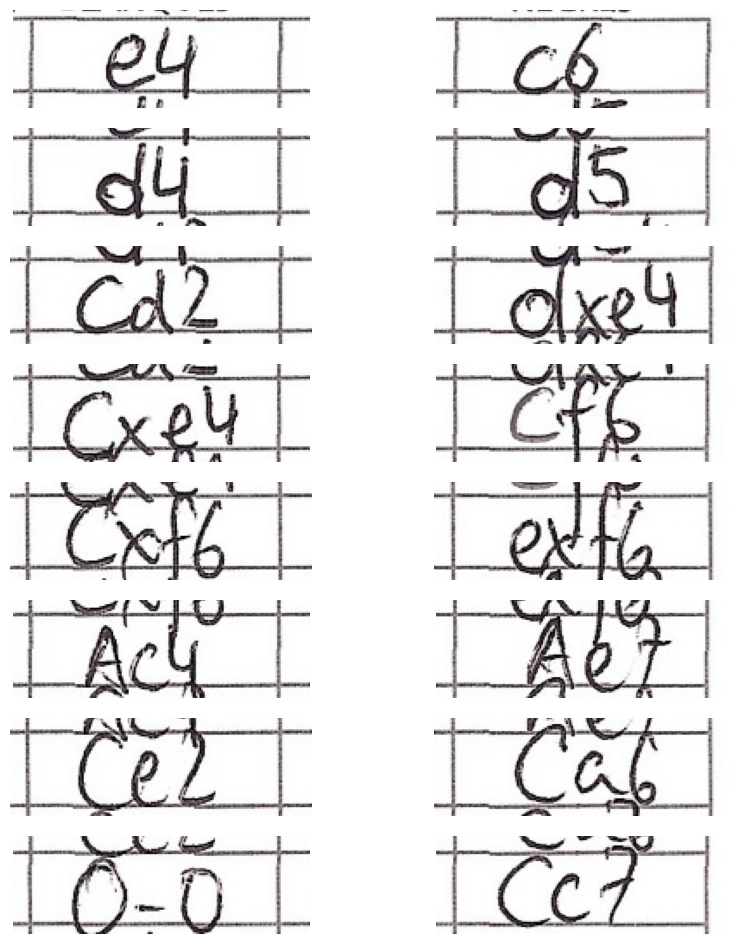

In [24]:
# MANUAL COORDS
ann = bxs.exportable(
  bxs.Annotations(grid_coords=bxs.Rectangle(tl=(0.05, 0.195), size=(0.935, 0.66))),
  'fcde'
).unsafe()
boxes = bxs.export(fcde_sheet, ann)
vc.show(*boxes[:16], ncols=2, height=1.5)